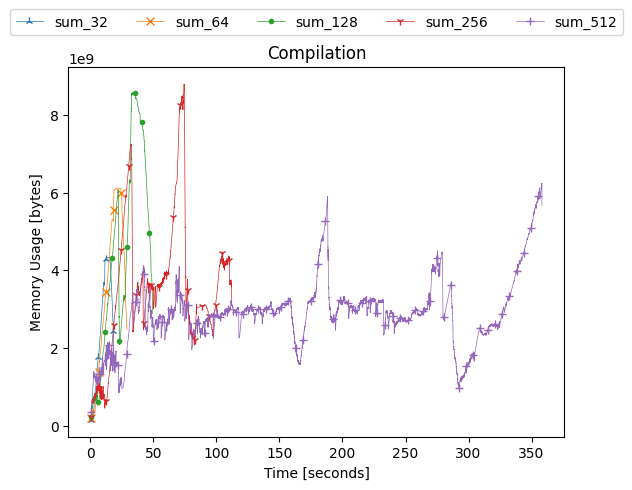

In [16]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/compilation.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/compilation.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Compilation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

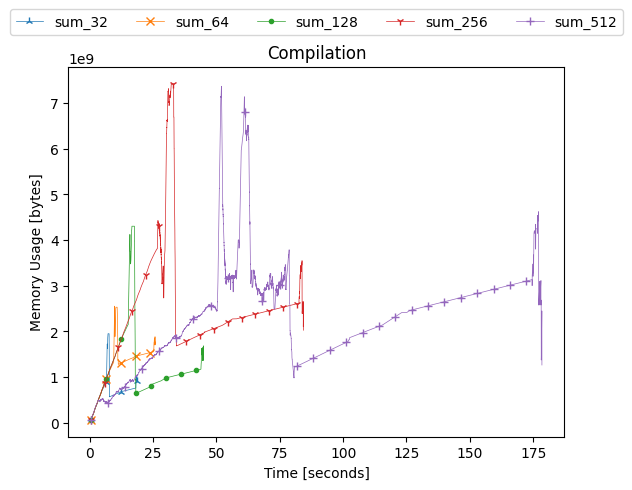

In [17]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/setup.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/setup.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Compilation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

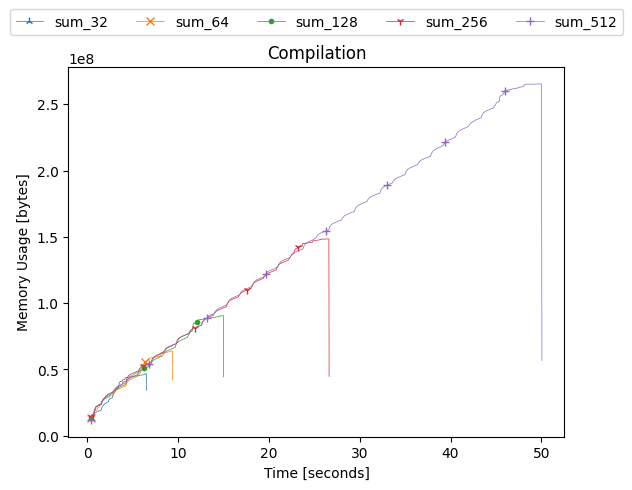

In [18]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/witness.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Compilation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

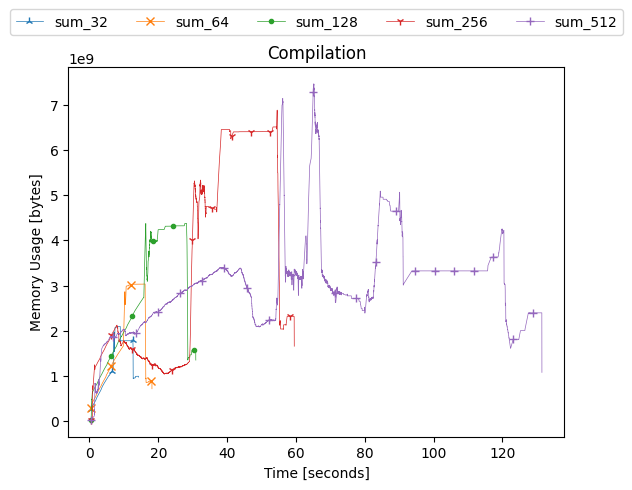

In [19]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/proof.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Compilation')
    pdf.savefig(bbox_inches="tight")
    plt.show()